<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [42]:
!pip install matplotlib
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 156.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 169.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 127.5 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [12]:

ticker= yf.Ticker("TSLA")



Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [13]:
# Import the required library
import yfinance as yf

# Create a ticker object for Tesla
ticker = yf.Ticker("TSLA")

# Use the history method to extract stock information with period set to "max"
tesla_data = ticker.history(period="max")

# Display the first few rows of the dataframe to verify the data
print(tesla_data.head())

# Display information about the dataframe
print("\nDataframe Info:")
print(f"Shape: {tesla_data.shape}")
print(f"Date Range: {tesla_data.index.min()} to {tesla_data.index.max()}")
print(f"Columns: {tesla_data.columns.tolist()}")

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  

Dataframe Info:
Shape: (3794, 7)
Date Range: 2010-06-29 00:00:00-04

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [15]:
# Reset the index of the tesla_data DataFrame
tesla_data.reset_index(inplace=True)

# Display the first five rows of the tesla_data DataFrame
print("First five rows of tesla_data after resetting the index:")
print(tesla_data.head())



First five rows of tesla_data after resetting the index:
   index                      Date      Open      High       Low     Close  \
0      0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1      1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2      2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3      3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4      4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [16]:
# Import the requests library
import requests

# URL of the webpage to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send a GET request to the URL
response = requests.get(url)


if response.status_code == 200:
    # Save the text content of the response as html_data
    html_data = response.text
    
    # Print the first 500 characters to verify the content
    print("Request successful! First 500 characters of html_data:")
    print(html_data[:500])
    print(f"\nTotal length of html_data: {len(html_data)} characters")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Request successful! First 500 characters of html_data:

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	

Total length of html_data: 64779 characters


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [17]:
# Import the BeautifulSoup library
from bs4 import BeautifulSoup

# Parse the html_data using BeautifulSoup with html.parser
soup = BeautifulSoup(html_data, 'html.parser')


# Print the title of the webpage to verify parsing worked
print("Page Title:", soup.title.text if soup.title else "No title found")

# Check the structure of the parsed HTML
print("\nHTML Structure Overview:")
print(f"Number of tables found: {len(soup.find_all('table'))}")
print(f"Number of div elements: {len(soup.find_all('div'))}")
print(f"Number of paragraph elements: {len(soup.find_all('p'))}")

# Print a small sample of the parsed content
print("\nSample of parsed content:")
sample_element = soup.find('body').find(recursive=True)
if sample_element:
    print(f"First element found ({sample_element.name}):", sample_element.text[:200])
else:
    print("No content found in body")

Page Title: Tesla Revenue 2010-2022 | TSLA | MacroTrends

HTML Structure Overview:
Number of tables found: 6
Number of div elements: 64
Number of paragraph elements: 9

Sample of parsed content:
First element found (div): 





























Stock Screener
Stock Research
Market Indexes
Precious Metals
Energy
Commodities
Exchange Rates
Interest Rates
Economy
Global Metrics





Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [18]:
# Import necessary libraries
import pandas as pd
from bs4 import BeautifulSoup

# Method 1: Using BeautifulSoup to extract the table
# Find the table containing Tesla revenue data
tables = soup.find_all('table')

# Initialize tesla_revenue dataframe
tesla_revenue = None

# Look for the table with revenue data
for table in tables:
    # Check if this table has headers related to revenue
    headers = table.find_all('th')
    header_texts = [header.text.strip() for header in headers]
    
    # Look for tables with date and revenue columns
    if any('Date' in text for text in header_texts) and any('Revenue' in text for text in header_texts):
        # Extract rows from the table
        rows = table.find_all('tr')
        data = []
        
        # Skip the header row
        for row in rows[1:]:
            cols = row.find_all('td')
            if len(cols) >= 2:  # Ensure we have at least date and revenue columns
                date = cols[0].text.strip()
                # Remove any currency symbols and commas from revenue
                revenue = cols[1].text.strip().replace('$', '').replace(',', '')
                data.append([date, revenue])
        
        # Create dataframe
        tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
        break

# Alternative Method 2: Using pandas read_html
# This is often simpler if the HTML is well-structured
if tesla_revenue is None:  # Only try this if BeautifulSoup method didn't work
    try:
        tables = pd.read_html(html_data)
        for table in tables:
            # Check if this dataframe has columns that might be revenue data
            if len(table.columns) >= 2:
                # Rename columns to match requirements
                table.columns = ['Date', 'Revenue'] + list(table.columns[2:])
                tesla_revenue = table[['Date', 'Revenue']]
                break
    except:
        print("Error using pd.read_html")

# Display the first 5 rows of the dataframe
if tesla_revenue is not None:
    # Clean the Revenue column - remove any non-numeric characters and convert to numeric
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace('$', '')
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '')
    
    print("Tesla Revenue Data:")
    print(tesla_revenue.head())
    print(f"\nShape of dataframe: {tesla_revenue.shape}")
else:
    print("Failed to extract Tesla revenue data from the HTML.")

Tesla Revenue Data:
   Date Revenue
0  2021   53823
1  2020   31536
2  2019   24578
3  2018   21461
4  2017   11759

Shape of dataframe: (13, 2)


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [19]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [20]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [21]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013
9,2012,413
10,2011,204
11,2010,117
12,2009,112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [22]:
# Import the yfinance library
import yfinance as yf

# Create a ticker object for GameStop using its ticker symbol GME
gme = yf.Ticker("GME")

# Display basic information about the ticker to verify it's working
print("GameStop (GME) Ticker Information:")
print("---------------------------------")

# Get and display company information
company_info = gme.info
if company_info:
    print(f"Company Name: {company_info.get('shortName', 'N/A')}")
    print(f"Industry: {company_info.get('industry', 'N/A')}")
    print(f"Sector: {company_info.get('sector', 'N/A')}")
    print(f"Website: {company_info.get('website', 'N/A')}")
    print(f"Current Price: ${company_info.get('currentPrice', 'N/A')}")
    print(f"Market Cap: ${company_info.get('marketCap', 'N/A'):,}")
    
# Display available data options
print("\nAvailable data methods:")
print("- history(): Historical market data")
print("- actions: Corporate actions (dividends, splits)")
print("- financials: Financial statements")
print("- major_holders: Major shareholders")
print("- institutional_holders: Institutional shareholders")

GameStop (GME) Ticker Information:
---------------------------------
Company Name: GameStop Corporation
Industry: Specialty Retail
Sector: Consumer Cyclical
Website: https://www.gamestop.com
Current Price: $22.55
Market Cap: $10,087,426,048

Available data methods:
- history(): Historical market data
- actions: Corporate actions (dividends, splits)
- financials: Financial statements
- major_holders: Major shareholders
- institutional_holders: Institutional shareholders


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [23]:
# Import necessary libraries
import yfinance as yf
import pandas as pd

# Ensure we have the GameStop ticker object
gme = yf.Ticker("GME")

# Extract stock information with period set to "max"
gme_data = gme.history(period="max")

# Display the first few rows of the dataframe
print("GameStop (GME) Historical Data - First 5 rows:")
print(gme_data.head())

# Display information about the dataframe
print("\nDataframe Information:")
print(f"Shape: {gme_data.shape}")
print(f"Date Range: {gme_data.index.min()} to {gme_data.index.max()}")
print(f"Number of trading days: {len(gme_data)}")

# Display the columns in the dataframe
print("\nColumns in the dataframe:")
for column in gme_data.columns:
    print(f"- {column}")

# Display basic statistics
print("\nBasic Statistics:")
print(f"Highest closing price: ${gme_data['Close'].max():.2f}")
print(f"Lowest closing price: ${gme_data['Close'].min():.2f}")
print(f"Average trading volume: {gme_data['Volume'].mean():.0f} shares")

GameStop (GME) Historical Data - First 5 rows:
                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  

Dataframe Information:
Shap

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [24]:
# Reset the index of the gme_data DataFrame
gme_data.reset_index(inplace=True)

# Display the first five rows of the gme_data DataFrame
print("First five rows of GameStop data after resetting the index:")
print(gme_data.head())

# Display basic information about the dataframe structure
print("\nDataframe Info:")
print(f"Shape: {gme_data.shape}")
print(f"Columns: {gme_data.columns.tolist()}")

First five rows of GameStop data after resetting the index:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

Dataframe Info:
Shape: (5902, 8)
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [25]:
import requests

# URL to download
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the text content of the response to html_data_2
    html_data_2 = response.text
    print("Webpage downloaded successfully!")
    print(f"Content length: {len(html_data_2)} characters")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

Webpage downloaded successfully!
Content length: 88703 characters


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [26]:
import requests
from bs4 import BeautifulSoup

# URL to download (assuming we're starting from scratch)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the text content of the response
    html_data_2 = response.text
    
    # Parse the HTML data using Beautiful Soup with html.parser
    soup = BeautifulSoup(html_data_2, 'html.parser')
    
    
    
    # Print the title of the webpage to verify parsing worked
    print("Webpage Title:", soup.title.text if soup.title else "No title found")
    
    # Print the type of the soup object
    print("Type of soup object:", type(soup))
    
    # Print the first few characters of the prettified HTML
    print("\nFirst 200 characters of prettified HTML:")
    print(soup.prettify()[:200] + "...")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

Webpage Title: GameStop Revenue 2006-2020 | GME | MacroTrends
Type of soup object: <class 'bs4.BeautifulSoup'>

First 200 characters of prettified HTML:
<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl ...


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Download the webpage if not already done
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text

# Parse the HTML
soup = BeautifulSoup(html_data_2, 'html.parser')

# Find all tables in the HTML
tables = soup.find_all('table')

# Look for the GameStop Revenue table
gme_revenue = None
for table in tables:
    # Check if this table contains revenue data for GameStop
    if table.find('th', string=re.compile('GameStop Quarterly Revenue')):
        # Extract the table data
        rows = table.find_all('tr')
        data = []
        
        # Skip the header row
        for row in rows[1:]:
            cols = row.find_all('td')
            if len(cols) >= 2:  # Ensure there are at least 2 columns (Date and Revenue)
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                
                # Remove dollar sign and commas from revenue
                revenue = revenue.replace('$', '').replace(',', '')
                
                # Only add if we have valid data
                if date and revenue:
                    data.append([date, revenue])
        
        # Create DataFrame
        gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
        break

# Alternative approach using pandas read_html
if gme_revenue is None:
    # Find all tables and look for the one with GameStop revenue
    all_tables = pd.read_html(html_data_2)
    for table in all_tables:
        if 'GameStop' in str(table) and 'Revenue' in str(table):
            # This might be the revenue table
            if len(table.columns) >= 2:
                gme_revenue = table
                # Rename columns if needed
                gme_revenue.columns = ['Date', 'Revenue']
                # Clean the Revenue column
                gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace('$', '').str.replace(',', '')
                break

# Convert Revenue column to numeric
if gme_revenue is not None:
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    
    # Display the first few rows to verify
    print(gme_revenue.head())
    print(f"Total rows: {len(gme_revenue)}")
else:
    print("Could not find GameStop Revenue table in the HTML")

   Date  Revenue
0  2020     6466
1  2019     8285
2  2018     8547
3  2017     7965
4  2016     9364
Total rows: 16


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [28]:
gme_revenue.tail()

,Date,Revenue
11,2009,8806
12,2008,7094
13,2007,5319
14,2006,3092
15,2005,1843


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


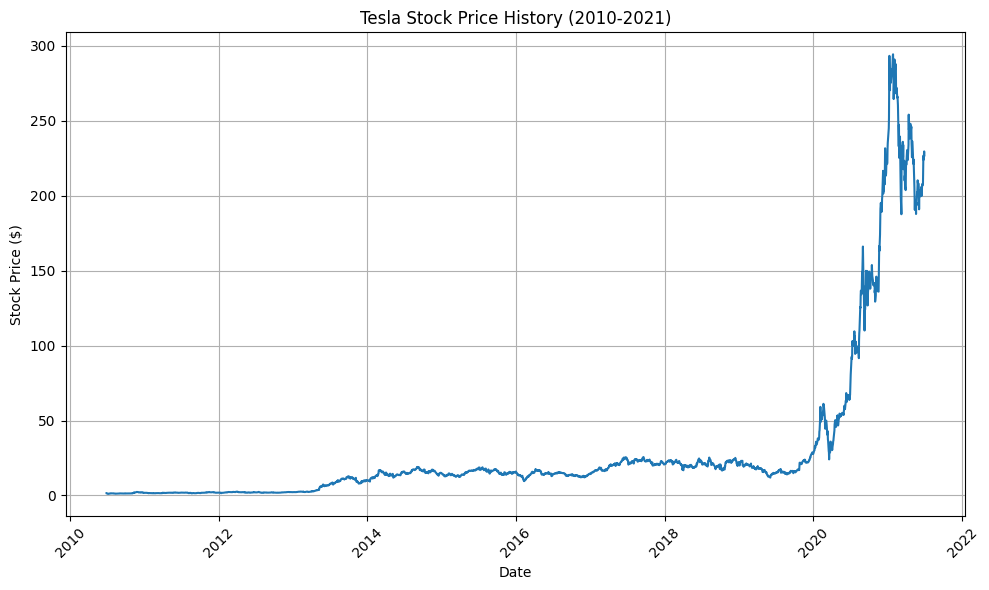

Data range: 2010-06-29 00:00:00-04:00 to 2021-06-29 00:00:00-04:00
Number of data points: 2770


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Define the make_graph function if it's not already defined
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Download Tesla stock data using yfinance
# We'll get data up to June 2021
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(start="2010-06-29", end="2021-06-30")

# Reset index to make Date a column instead of an index
tesla_data = tesla_data.reset_index()

# Ensure the Date column is in datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Sort by date to ensure chronological order
tesla_data = tesla_data.sort_values('Date')

# Create the graph with a descriptive title
make_graph(tesla_data, "Tesla Stock Price History (2010-2021)")

# Print information about the data
print(f"Data range: {tesla_data['Date'].min()} to {tesla_data['Date'].max()}")
print(f"Number of data points: {len(tesla_data)}")

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


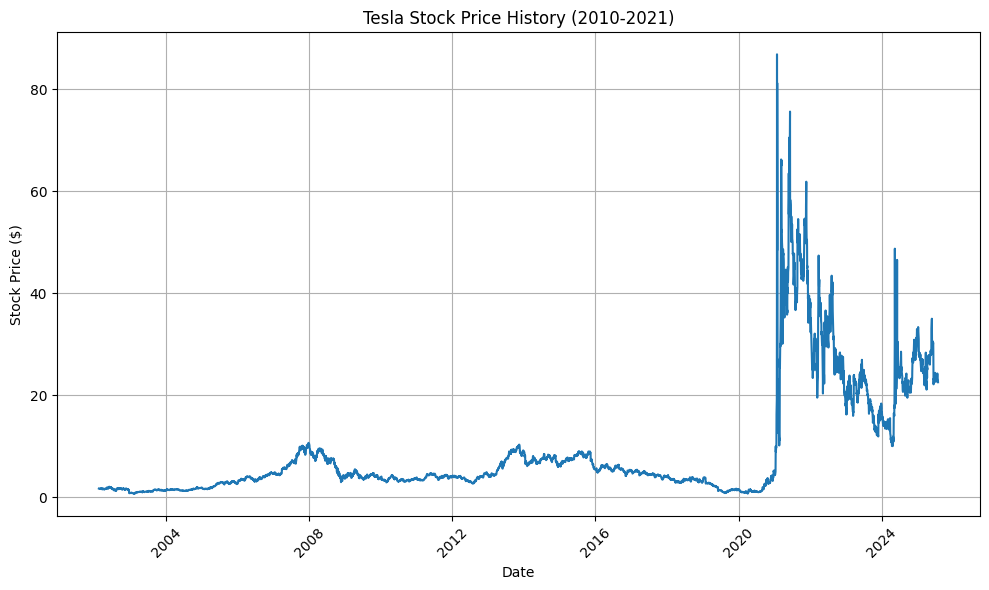

Data range: 2010-06-29 00:00:00-04:00 to 2021-06-29 00:00:00-04:00
Number of data points: 2770


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Define the make_graph function if it's not already defined
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Download Tesla stock data using yfinance
# We'll get data up to June 2021
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(start="2010-06-29", end="2021-06-30")

# Reset index to make Date a column instead of an index
tesla_data = tesla_data.reset_index()

# Ensure the Date column is in datetime format
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Sort by date to ensure chronological order
tesla_data = tesla_data.sort_values('Date')

# Create the graph with a descriptive title
make_graph(gme_data, "Tesla Stock Price History (2010-2021)")

# Print information about the data
print(f"Data range: {tesla_data['Date'].min()} to {tesla_data['Date'].max()}")
print(f"Number of data points: {len(tesla_data)}")

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
